In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Get data

In [2]:
data_array = pd.read_csv('data06.csv',delimiter=';')

In [3]:
data_array

,x,y,z
0,0.009,0.933,0
1,0.948,0.108,1
2,0.178,0.201,0
3,0.663,0.379,1
4,0.712,0.279,1
...,...,...,...
95,0.147,0.471,0
96,0.620,0.568,1
97,0.137,0.759,0
98,0.070,0.492,0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data_array[['x','y']].values,     
                                                    data_array['z'].values, 
                                                    train_size=0.5)

In [5]:
w = 2*np.random.random((2,1)) - 1

In [6]:
w

array([[ 0.31617853],
       [-0.84217513]])

# Learning

In [7]:
tau = 0
era=True
while era:
    error_count = 0
    for iter in range(len(y_train)):
        mult = np.dot(x_train[iter],w)
        if mult<=tau:
            y = 0
        else:
            y = 1
        w[0] += 0.01*(y_train[iter]-y)*x_train[iter][0]
        w[1] += 0.01*(y_train[iter]-y)*x_train[iter][1]
        tau -= 0.01*(y_train[iter]-y)
        error_count += abs(y_train[iter]-y)
    if error_count==0:
        era = False

In [8]:
y_pred = np.dot(x_train,w)
for i in range(len(y_pred)):
    y_pred[i]-=tau

In [9]:
y_train

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

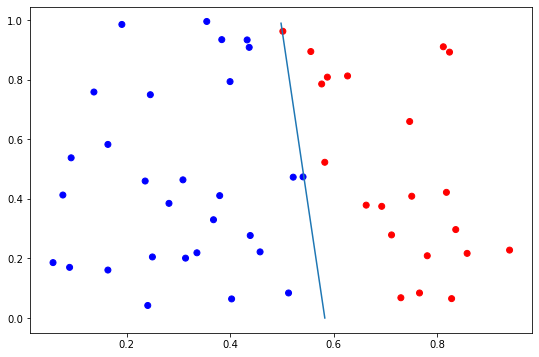

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
x2 = np.arange(0,1,0.01)
x1 = -(x2*w[1]-tau)/w[0]
ax.plot(x1, x2)
color = ['red' if value == 1 else 'blue' for value in y_train]
ax.scatter(x_train[:,0], x_train[:,1], marker = 'o', color = color)
plt.show()

In [11]:
for i in range(len(y_pred)):
    if y_pred[i]<=0:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [12]:
errors=sum(abs(y_train[j]-y_pred[j]) for j in range(len(y_train)))
print('Количество ошибок: '+str(errors))

Количество ошибок: [0.]


# Predicting

In [13]:
y_test

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int64)

In [14]:
y_test_pred = np.dot(x_test,w)
for i in range(len(y_test_pred)):
    y_test_pred[i]-=tau
    if y_test_pred[i]<=0:
        y_test_pred[i] = 0
    else:
        y_test_pred[i] = 1

In [15]:
y_test_pred.T

array([[0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 0.]])

In [16]:
errors=sum(abs(y_test[j]-y_test_pred[j]) for j in range(len(y_test)))
print('Количество ошибок: '+str(errors))

Количество ошибок: [1.]


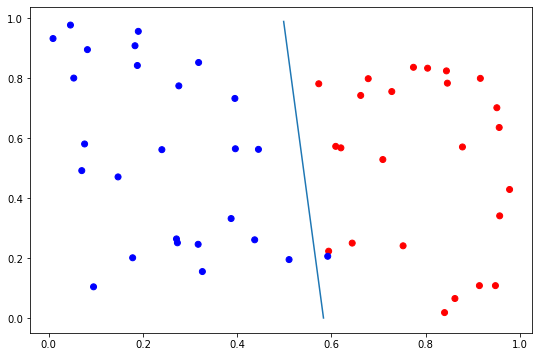

In [17]:
fig, ax1 = plt.subplots(figsize=(9,6))
ax1.plot(x1, x2)
color = ['red' if value == 1 else 'blue' for value in y_test]
ax1.scatter(x_test[:,0], x_test[:,1], marker = 'o', color = color)
plt.show()

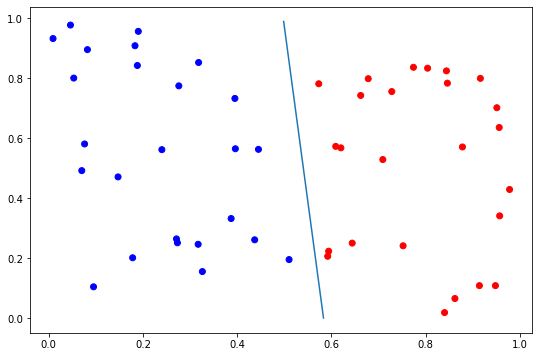

In [18]:
fig, ax2 = plt.subplots(figsize=(9,6))
ax2.plot(x1, x2)
color = ['red' if value == 1 else 'blue' for value in y_test_pred]
ax2.scatter(x_test[:,0], x_test[:,1], marker = 'o', color = color)
plt.show()